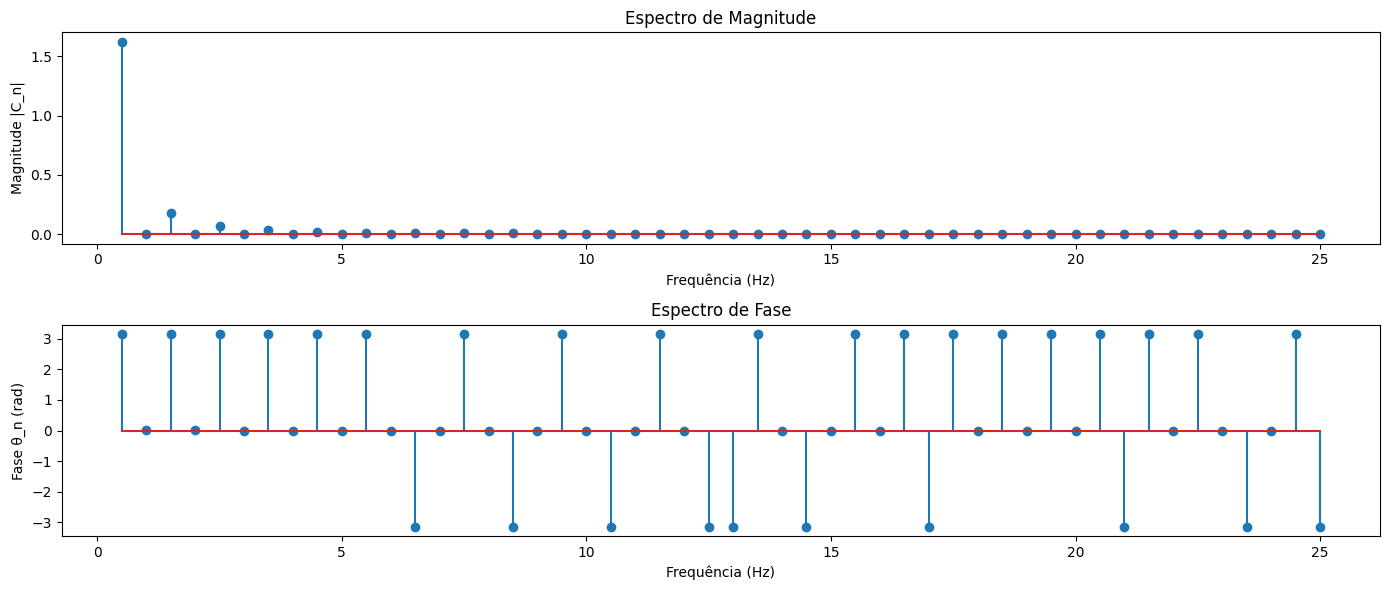

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
f0 = 1 / 2  # Frequência fundamental (1/T com T = 2s)
max_freq = 25  # Frequência máxima para o plot
harmonics = int(max_freq // f0)  # Número de harmônicas até 25 Hz

# Arrays para armazenar os valores
n_values = np.arange(0, harmonics + 1)  # Incluindo n=0 para o C0
frequencies = n_values * f0  # Frequências em Hz

# Função para Cn e thetan
def Cn(n):
    return np.sqrt(
        ((-2 * np.pi * n * np.sin(2 * np.pi * n) + 8 * (-1)**n - 8) / (np.pi**2 * n**2))**2 +
        ((8 * np.cos(2 * np.pi * n) - 8) / (np.pi * n) - (4 * np.sin(2 * np.pi * n)) / (np.pi**2 * n**2))**2
    )

def theta_n(n):
    return np.arctan2(
        (8 * np.cos(2 * np.pi * n) - 8) / (np.pi * n) - (4 * np.sin(2 * np.pi * n)) / (np.pi**2 * n**2),
        -2 * np.pi * n * np.sin(2 * np.pi * n) + 8 * (-1)**n - 8
    )

# Cálculo para n=0 (C0)
C0 = 0  # Como exemplo, se for uma função simétrica ao redor do eixo (média = 0)
theta_0 = 0  # A fase para o valor médio é geralmente 0

# Calculando Cn e thetan para cada harmônica
Cn_values = np.array([C0] + [Cn(n) for n in range(1, harmonics + 1)])
theta_values = np.array([theta_0] + [theta_n(n) for n in range(1, harmonics + 1)])

# Plotando o espectro de magnitude
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.stem(frequencies, Cn_values)  # Removido use_line_collection=True
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude |C_n|')
plt.title('Espectro de Magnitude')

# Plotando o espectro de fase
plt.subplot(2, 1, 2)
plt.stem(frequencies, theta_values)  # Removido use_line_collection=True
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase theta_n (rad)')
plt.title('Espectro de Fase')

plt.tight_layout()
plt.show()
